In [1]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torch.nn as nn
from tqdm import tqdm # progress bar
from torch.optim import Adam

# custom modules
from model import (StentDataset, # custom dataset
                   ImageAugmentation, # custom image generator
                   UNet) # our PyTorch U-Net model

## Data Augmentation

In [2]:
# custom image generator
image_generator = ImageAugmentation(base_image_path="data/dataset/base_png")

# generate train images
image_generator.generate_input_images(n_images=100,
                                      save_path="data/dataset/train",
                                      generate_input=True,
                                      print_progress=True)

# generate test images
image_generator.generate_input_images(n_images=20,
                                      save_path="data/dataset/test",
                                      generate_input=True,
                                      print_progress=False)

Generating 100 output images...
0/100 output images generated.  progress : 1%
1/100 output images generated.  progress : 2%
2/100 output images generated.  progress : 3%
3/100 output images generated.  progress : 4%
4/100 output images generated.  progress : 5%
5/100 output images generated.  progress : 6%
6/100 output images generated.  progress : 7%
7/100 output images generated.  progress : 8%
8/100 output images generated.  progress : 9%
9/100 output images generated.  progress : 10%
10/100 output images generated.  progress : 11%
11/100 output images generated.  progress : 12%
12/100 output images generated.  progress : 13%
13/100 output images generated.  progress : 14%
14/100 output images generated.  progress : 15%
15/100 output images generated.  progress : 16%
16/100 output images generated.  progress : 17%
17/100 output images generated.  progress : 18%
18/100 output images generated.  progress : 19%
19/100 output images generated.  progress : 20%
20/100 output images genera

In [7]:
# pytorch dataset object
dataset = StentDataset(input_path="data/dataset/train/x",
                       target_path="data/dataset/train/y")

In [4]:
model = UNet(in_channels=1, out_channels=1)
model.double()
training_loader = DataLoader(dataset, batch_size=1, shuffle=True)
criterion = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=0.001)

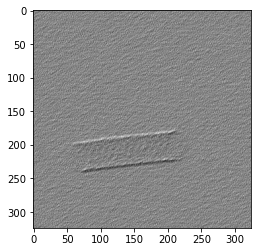

In [5]:
# initial prediction image
plt.imshow(dataset[26][0], cmap="gray")
prediction = model(dataset[26][0].reshape(1, 512, 512))
plt.imshow(prediction.detach().numpy()[0], cmap="gray")

In [6]:
# parameters
epochs = 1
batch_size = 1

# training
losses = []
for epoch in range(epochs):
    for i, data in enumerate(tqdm(training_loader)):
        # get the inputs
        inputs, targets = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        # print statistics
        losses.append(loss.item())
        print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
              .format(epoch + 1, epochs, i + 1, len(training_loader), loss.item()))

  1%|          | 1/100 [00:08<14:18,  8.67s/it]

Epoch [1/1], Step [1/100], Loss: 1.1887


  2%|▏         | 2/100 [00:17<13:52,  8.50s/it]

Epoch [1/1], Step [2/100], Loss: 1.0431


  3%|▎         | 3/100 [00:25<13:27,  8.32s/it]

Epoch [1/1], Step [3/100], Loss: 0.7254


  3%|▎         | 3/100 [00:34<18:25, 11.39s/it]


KeyboardInterrupt: 

In [ ]:
# save the model
